In [118]:
from fastai.vision.all import *
from fastbook import *

In [119]:
# Downlaod MNIST sample dataset
# MNIST is a dataset of handwritten digits
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

In [120]:
# Check what is in the directory of path
path.ls()

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

In [121]:
# Check train folder in path
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [122]:
# Assign path to threes and sevens training sets to variables, check what is inside threes folder
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [123]:
# Check an image in the threes folder
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [124]:
# View a section of the numbers that make up the image
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [125]:
# Slice the array to pick the part with the top of the digit
# Use a pandas DF to color code values using a gradient
# Showing how image is created using pixel values
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [126]:
# Idea 1 to classifying 3 vs 7 - pixel similarity
# Find the average pixel value for every pixel of the 3s and 7s. which will give us an "ideal" pixel value for a 3 and 7
# To classify, find which of the ideal digits the image is most similar to

# Create a tensor to stack all three and seven images together
seven_tensors = [tensor(Image.open(o))for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

len(three_tensors),len(seven_tensors)

(6131, 6265)

<Axes: >

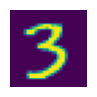

In [127]:
# Check that an image looks ok with a tensor
show_image(three_tensors[1])

In [128]:
# Combine all images in the list into a single three dimensional tensor
# Pytorch stack function will combine all images in the list
# Some Pytorch functions require an integer being cast as float type, so we do it ahead of time
# When images are floats, pixel values are between 0 and 1 - divide by 255 here (pixel value between 0 and 255)
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

stacked_threes.shape

torch.Size([6131, 28, 28])

In [129]:
# A tensors rank is the length of its shape
len(stacked_threes.shape)

3

In [130]:
# Another way to get a tensors rank
stacked_threes.ndim

3

<Axes: >

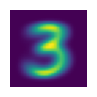

In [131]:
# Compute what ideal 3 looks like
# Take the average along dimension 0 (images) of the stacked tensor
# For every pixel position, this computes the average of that pixel over all images. One value for every pixel position is created, making a single image

mean_3 = stacked_threes.mean(0)
show_image(mean_3)

<Axes: >

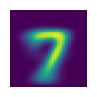

In [132]:
# do the same for 7
mean_7 = stacked_sevens.mean(0)
show_image(mean_7)

<Axes: >

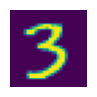

In [133]:
# Take a sample three
a_3 = stacked_threes[1]
show_image(a_3)

In [134]:
# Calculate how far from an ideal 3 it is
# L1 Norm
dist_3_abs = (a_3 - mean_3).abs().mean()
# RMSE
dist_3_sqr = ((a_3 - mean_3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [135]:
# Calculate how far from an ideal 7 it is
# L1 Norm
dist_7_abs = (a_3 - mean_7).abs().mean()
# RMSE
dist_7_sqr = ((a_3 - mean_7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [136]:
# Pytorch provides L1 Norm and RMSE as default loss functions
F.l1_loss(a_3.float(),mean_7), F.mse_loss(a_3,mean_7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [137]:
# Creating an array or tensor ex
data = [[1,2,3], [4,5,6]]
arr = array (data)
tns = tensor(data)

In [138]:
# Numpy array
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [139]:
# Pytorch tensor
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [140]:
# Examples of things you can do on an array / tensor
# select a row
tns[1]

tensor([4, 5, 6])

In [141]:
# select a column
tns[:,1]


tensor([2, 5])

In [142]:
# combine with python slice syntax to select part of row or column
tns[1,1:3]

tensor([5, 6])

In [143]:
# use standard operators
tns+1


tensor([[2, 3, 4],
        [5, 6, 7]])

In [144]:
# tensors have a type
tns.type()


'torch.LongTensor'

In [145]:
# automatically change type if needed
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [146]:
# Question 9 in quiz
data = [[1,2,3],[4,5,6],[7,8,9]]

tns = tensor(data)

tns_dbl = tns*2

tns_dbl

tensor([[ 2,  4,  6],
        [ 8, 10, 12],
        [14, 16, 18]])

In [147]:
# Create tensors for validation sets
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [148]:
# Create function to calculate mean absolute error

# function breakdown
# (a-b) - allows broadcasting
# abs() - applies absolute value to each individual element of the tensor, then returns a tensor of the results
# mean((-1,-2)) - (-1,-2) represents a range of axis. This tells PyTorch we want the mean ranging over values indexed by the last two axis of the tensor

def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean_3)

tensor(0.1114)

In [149]:
# Broadcasting example
# tensor([1]) is expanded to be tensor([1,1,1])
tensor([1,2,3]) + tensor([1])

tensor([2, 3, 4])

In [150]:
# mean_3 is a rank 2 tensor representing a single image
# PyTorch treats mean_3 as if it were 1,010 copies of the single image
# Then those 1,010 copies are subtracted from each 3 in the validation set

# Calculates the difference between the "ideal 3" (mean 3), and each of the 1,010 3s in the validation set
(valid_3_tens - mean_3).shape

torch.Size([1010, 28, 28])

In [151]:
# Use mnist_distance to figure out if an image is a 3
# If distance between digit and ideal 3 is less than distance between digit and ideal 7, it is a 3
def is_3(x): return mnist_distance(x,mean_3) < mnist_distance(x, mean_7)

In [152]:
# Testing if function works
# If we convert boolean T/F response to a float, it is either 1.0 or 0.0
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [153]:
# Testing on validation tensor with broadcasting
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [154]:
# Calculate accuracy for each of the 3sand 7s by taking average of function for all 3s and inverse for 7s

accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float().mean())

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

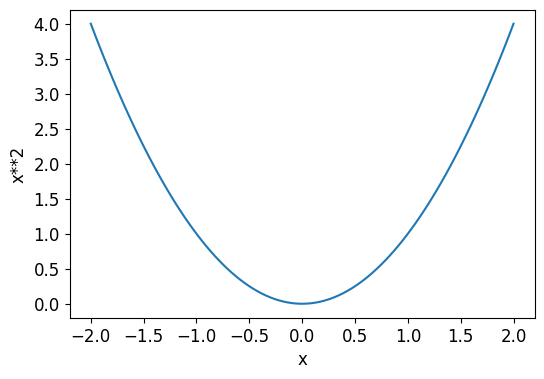

In [155]:
def f(x): return x**2

plot_function(f, 'x', 'x**2')

In [156]:
# Pick a tensor value that we want gradients at
# requires_grad_() tells PyTorch we want to calculate gradients with respect to that variable at that variable
xt = tensor(3.).requires_grad_()

In [157]:
# Calculate our function using that value
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [158]:
# Tell PyTorch to calculate the gradient
yt.backward()

In [159]:
# View gradients by checking grad attribute of tensor
xt.grad

tensor(6.)

In [160]:
# Repeat, but with a vector argument for the function

xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [161]:
# Add sum to function so it can take a vector and return a scalar
def f(x): return(x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [162]:
# Calculate gradients
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

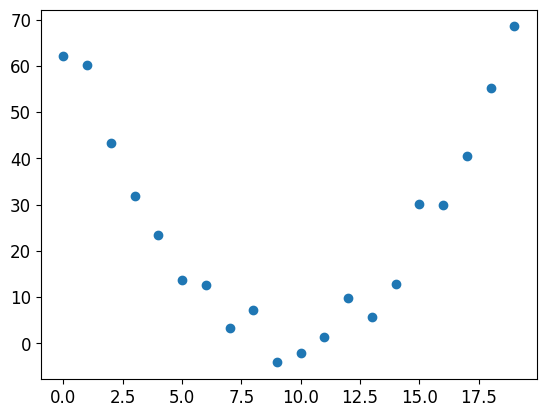

In [163]:
# Full SGD example
# Measuring the speed of a rolloer coaster as it went over a hill
# Creating fake data to fit the idea above

# 20 seconds of time measured
time = torch.arange(0,20).float(); time

# Random speed at each of those 20 seconds
speed = torch.randn(20)*3 + 0.75*(time - 9.5)**2 + 1

plt.scatter(time, speed)

In [164]:
# Can't consider every possible function, we guess that it will be quadratic
# Function like: a*(time**2)+(b*time)+c

# We distinguish between the functions input (time, t) and the parameters (a,b,c) - the values that define the quadratic being tried
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

# Every quadratic function is fully defined by a,b,c
# To find the best quadratic function, we only need to find the best values for a,b,c
# If we can solve to find the three parameters of a quadratic function, we can apply the same approach for more complex functions (neural nets)

In [165]:
# Choose a loss function
# For continuous data, a common loss function is MSE - mean squared error
def mse(preds, targets): return((preds-targets)**2).mean()

In [166]:
# Step 1: Initialize parameters
# Use random values and tell PyTorch to track their gradients
params = torch.randn(3).requires_grad_()

In [167]:
# Step 2: Calculate predictions
preds = f(time, params)

In [168]:
# Create a function to visaulize how close predictions are to targets
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

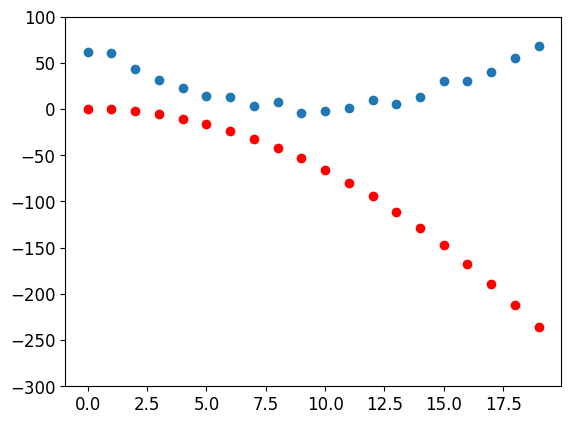

In [169]:
show_preds(preds)

In [170]:
# Step 3: Calculate loss
# Calculate the loss using the earlier defined MSE function
loss = mse(preds, speed)
loss

tensor(18141.9590, grad_fn=<MeanBackward0>)

In [171]:
# Step 4: Calculate the gradients
# Calculate and approximation of how the parameters need to change
loss.backward()
params.grad

tensor([-44402.4141,  -2845.0056,   -212.2690])

In [172]:
# Multiply gradients by learning rate - in this case, we pick 1e-5, or 0.00001
params.grad * 1e-5

tensor([-0.4440, -0.0285, -0.0021])

In [173]:
params

tensor([-0.6467, -0.1661,  0.5951], requires_grad=True)

In [174]:
# Step 5: Step the weights
# Update parameters based on gradients we just calculated

lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [175]:
# Check to see if the loss has improved
preds = f(time, params)
mse(preds, speed)

tensor(3937.4524, grad_fn=<MeanBackward0>)

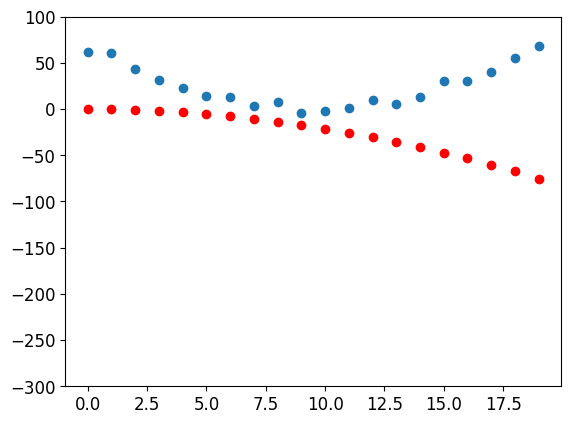

In [176]:
# Visualize again
show_preds(preds)

In [177]:
# SGD needs to be ran multiple times, to we create a function to apply 1 step
def apply_step(params, prn=True):
    preds = f(time,params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [178]:
# Step 6: repeat process
# Now we iterate multiple times, to reach a good predictor
for i in range(10): apply_step(params)

3937.452392578125
1249.52490234375
740.8843383789062
644.6314697265625
626.414794921875
622.9651489257812
622.3097534179688
622.1832275390625
622.1566772460938
622.1490478515625


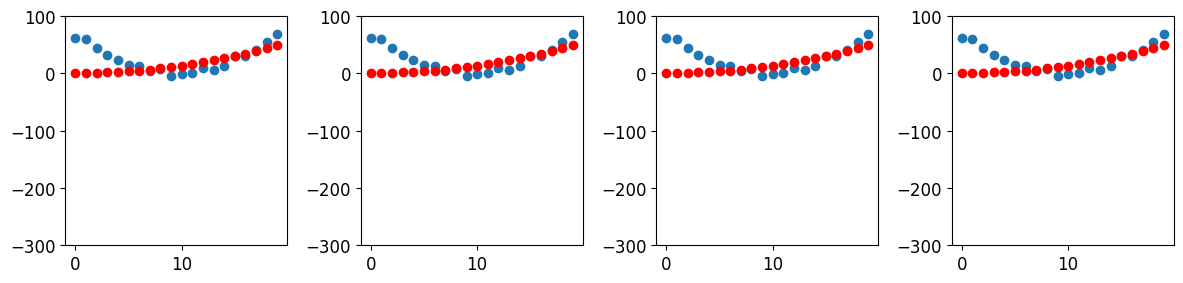

In [179]:
# See process visually of finding the best function
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [180]:
# Step 7: stop
# We stopped at 10 epochs arbitrarily

In [181]:
# MNIST loss function
# We start by concatenating all our independent variables - the images - into a single function
# Also change them from a list of matrices to a list of vectors (rank 3 to rank 2 tensor)
# View - PyTorch method that changes the shape of a tensor without changing it contents.
# -1 tells view to make the axis as big as necessary to fit all the data
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [182]:
# A label is needed for each image
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape 

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [183]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [184]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [185]:
# Initialize step in SGD
# Add a weight for every pixel
def init_params(size, std=1.0): return(torch.randn(size)*std).requires_grad_()

In [186]:
weights = init_params((28*28, 1))

In [187]:
# Weight * pixel won't work for white pixels with value 0.
# Formula for a line is y=mx+b - we need to initialize b
bias = init_params(1)

# In a neural network, m is the weights, and b is the bias. Together weights and bias make up parameters

In [188]:
# Calculate prediction for one image
# x = train_x, m = weights, b = bias
# y = mx+b
(train_x[0]*weights.T).sum() + bias

tensor([7.1331], grad_fn=<AddBackward0>)

In [189]:
# Matrix multiplication calculates mx for every row of a matrix
# More efficient way to solve for prediction of every image
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

# The equation batch@weights + bias is one of two fundamental equations of any neural network

tensor([[ 7.1331],
        [ 9.7273],
        [ 0.7299],
        ...,
        [ 1.7668],
        [-3.8504],
        [ 9.9804]], grad_fn=<AddBackward0>)

In [190]:
# Check accuracy
# To decide if output represents 3 or 7, we just check whether it is greater than 0.0
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [ True],
        [False]])

In [191]:
corrects.float().mean().item()

0.444498211145401

In [192]:
# Check what the change in accuracy for a small change in one of the weights
with torch.no_grad(): weights[0] *= 1.0001

In [193]:
preds = linear1(train_x)
((preds>0.0).float()==train_y).float().mean().item()

0.444498211145401

In [194]:
# We need gradients to improve our model in SGD
# We need a loss function to calculate gradients
# Loss function will show that if the correct answer is 3, the score is a little higher, and if the answer is 7, the score is a little lower
# The function needs the images and the predictions from the model
# prds - each value is the prediction that an image is a 3
# Function needs to measure the difference between predicted values and true values
# trgts - 0 or 1, tells if an image is a 3

# practice trgts and prds
trgts = tensor([1,0,1])
prds = tensor([0.9, 0.4, 0.2])

In [195]:
# First pass at a loss function, measuring distance between predictions and targets
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

# torch.where(a,b,c) - same as list comprehension [b[i] if a[i] else c[i] for i in range(len(a))], except it works on tensors at cuda speeds
# This specific function measures how distance each prediction is from 1 if it should be a 1, and how distant it is from 0 if it should be a 0, then takes the mean of all distances

In [196]:
# try it on trgts and preds
mnist_loss(prds, trgts)
# One current problem of function is it assumes predictions are always between 0 and 1

tensor(0.4333)

In [197]:
# Sigmoids
# Sigmoid always outputs a number between 0 and 1

def sigmoid(x): return 1/(1+torch.exp(-x))

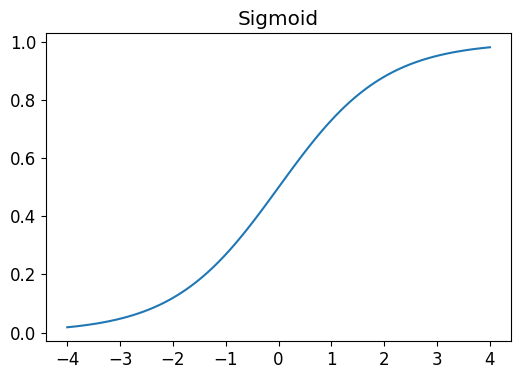

In [198]:
# PyTorch defines an accelerated sigmoid function, so we can use that
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [199]:
# Update mnist_loss to apply sigmoid to gradients first
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

# This ensures that our loss function will work, even if predictions are not between 0 and 1

In [200]:
# Implement gradient descent
# Pseudocode of gradient descent for each epoch

# for x,y in dl:
#     pred = model(x)
#     loss = loss_func(pred, y)
#     loss.backward()
#     parameters -= parameters.grad*lr

In [201]:
# Re-initialize parameters
weights = init_params((28*28, 1))
bias = init_params(1)

In [202]:
# Create a dataloader from the dataset
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [203]:
# Create dataloader for validation dataset
valid_dl = DataLoader(valid_dset, batch_size=256)

In [204]:
# Create a mini batch of size 4 for testing
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [205]:
preds = linear1(batch)
preds

tensor([[-16.0443],
        [ -2.6562],
        [ -3.3153],
        [-16.6191]], grad_fn=<AddBackward0>)

In [206]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.9748, grad_fn=<MeanBackward0>)

In [207]:
# Calculate gradients
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0034), tensor([-0.0238]))

In [208]:
# Put prediction, loss, and gradient calculation into a function
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [209]:
# Test
calc_grad(batch,train_y[:4],linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0068), tensor([-0.0476]))

In [210]:
# Calling it twice changes the gradients
# Loss will add gradients of loss to any gradients that are currently stored
# Set current gradients to 0 first

weights.grad.zero_()
bias.grad.zero_();

In [211]:
# last remaining step is to update the weights and biases based on gradient and learning rate
# Need to tell pytorch not to take the gradient of this step in order to avoid confusion
# Basic epoch training loop
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [212]:
# Also want to check accuracy by looking at the validation set
# To check if output is 3 or 7, we can just check if it is greater tahn 0
# Use broadcasting to calculate accuracy
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [213]:
# Create function to calculate validation accuracy
def batch_accuracy(xb,yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [214]:
# Check that is works
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [215]:
# put batches together
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(),4)

In [216]:
validate_epoch(linear1)

0.5354

In [217]:
# train for one epoch and see if accuracy improves
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.7737

In [218]:
# Train for more epochs
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8845 0.9178 0.9348 0.9446 0.9524 0.9554 0.9573 0.9588 0.9612 0.9636 0.9641 0.9646 0.9656 0.9666 0.9671 0.9676 0.969 0.9695 0.9695 0.9705 

In [219]:
# PyTorch provides classes to implement the general foundations easier
# WE can replace linear1 function with nn.Linear module from PyTorch
# nn.Linear does the same thing as init_params and linear together
# It contains the weights and biases in a single class

linear_model = nn.Linear(28*28,1)

In [220]:
# PyTorch even knows what parameters we can train on - available through the parameters method
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [227]:
# We can use this to create a simple optimizer
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None
     

In [222]:
# Create optimizer by passing in models parameters
opt = BasicOptim(linear_model.parameters(), lr)

In [228]:
# Simplify training loop

def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [224]:
# Validation function stays the same
validate_epoch(linear_model)

0.4047

In [229]:
# Put it into a function to simplify

def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')
     

In [230]:
train_model(linear_model, 20)

0.4932 0.8174 0.8442 0.915 0.9355 0.9472 0.9565 0.9623 0.9658 0.9672 0.9702 0.9721 0.9736 0.9751 0.976 0.9765 0.9775 0.9785 0.9785 0.979 

In [231]:
# FastAI also provides the SGD class that does the same thing as BasicOptim
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.855 0.831 0.9096 0.9321 0.9457 0.956 0.9628 0.9653 0.9677 0.9692 0.9716 0.9736 0.9751 0.976 0.9765 0.9775 0.9785 0.9785 0.9785 

In [232]:
# FastAI also provides Learner.fit, which we can substitute for train_model
# To create a learner, we need to create DataLoads by passing in training and validation DataLoaders
dls = DataLoaders(dl, valid_dl)

In [233]:
# To create a learner without using an application (ex vision_learner), pass in all elements we have created so far
# DataLoaders, model, optimization function, loss function, metrics to print
learn = Learner(dls, nn.Linear(28*28, 1),opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [234]:
# Now we can call fit on the learner
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636736,0.503304,0.495584,00:00
1,0.464964,0.235465,0.789990,00:00
2,0.173247,0.161472,0.857213,00:00
3,0.077197,0.099942,0.916094,00:00
4,0.041752,0.074381,0.935231,00:00
5,0.027865,0.060200,0.949951,00:00
6,0.022118,0.051274,0.956820,00:00
7,0.019526,0.045296,0.963690,00:00
8,0.018188,0.041072,0.965653,00:00
9,0.017371,0.037942,0.968106,00:00


In [235]:
# Basic neural network definition

def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

# All we have is two linear classifiers and a max function between them

In [236]:
# W1 and W2 are weight tensors
# b1 and b2 are bias tensors
# W1 has 30 output activations, so w2 needs 30 input activations
# First layer can construct 30 different features

w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params(30,1)
b2 = init_params(1)

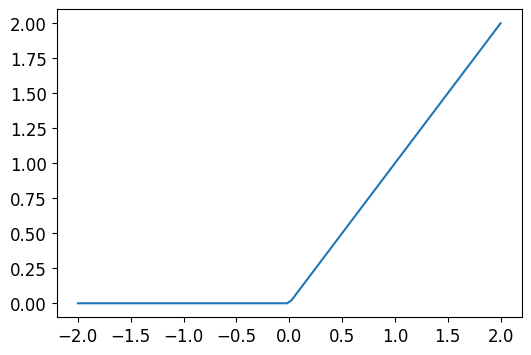

In [238]:
# res.max(tensor(0.0)) is a rectified linear unit (ReLU)
plot_function(F.relu)

In [ ]:
# Using more linear layer, the model can do more computation and have more complext functions
# We can't put linear layers directly after each other - we could replace multiplying multiple things and adding multiple times with multiplying different things and adding them once
# Simply, a series of any number of linear layers in a row can be replaces with a single linear layer with a different set of params
# Putting an activation layer between linear layers decouples the layers, and they can each do their own work

In [239]:
# Replace code with something simpler using PyTorch
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

# nn.Sequential creates a module that will call each of the listed layers/functions in turn
# nn.ReLU is a PyTorch module that does the exact same thing as F.relu, but since Sequential made a PyTorch class, we need to use the PyTorch ReLU


In [240]:
learn = Learner(dls, simple_net, opt_func=SGD,loss_func=mnist_loss, metrics=batch_accuracy)

In [241]:
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.347399,0.378569,0.548086,00:00
1,0.159284,0.239369,0.795878,00:00
2,0.086505,0.118394,0.914622,00:00
3,0.055383,0.079032,0.940137,00:00
4,0.041088,0.061494,0.958292,00:00
5,0.033924,0.051735,0.963690,00:00
6,0.029910,0.045594,0.965653,00:00
7,0.027367,0.041399,0.967125,00:00
8,0.025569,0.038352,0.968106,00:00
9,0.024194,0.036030,0.968597,00:00


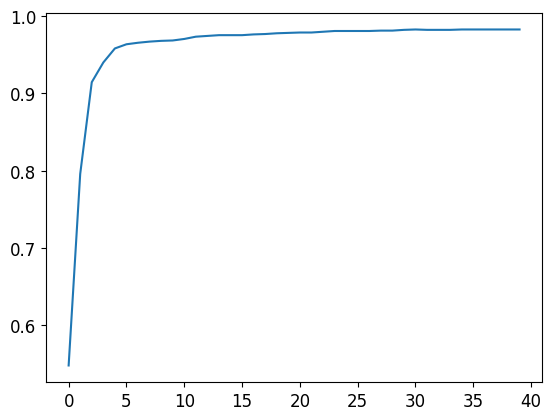

In [242]:
# Since nn.Sequential is a modeul, we can get its parameters
# Training process is recorded in learn.recorder
# Plot training process
plt.plot(L(learn.recorder.values).itemgot(2))

In [243]:
# View final accuracy
learn.recorder.values[-1][2]

0.982826292514801